Introduction

This project will analyze data from different countries and conclude if there is a connection between GPD and life expectancy for those countries

Here is a list of questions that this project will try to answer:

- What is the average life expectancy (LE) and GDP per country?
- How did GDP and LE evolved through the years?
- Is there a correlation between the 2 fields?


In [33]:
## Import modules

import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from matplotlib import pyplot as plt
import numpy as np
import math

In [5]:
##Load data
all_data = pd.read_csv('all_data.csv')

##Rename the column to LE
all_data.rename(columns={'Life expectancy at birth (years)': 'LE'}, inplace=True)

print(all_data.head())


  Country  Year    LE           GDP
0   Chile  2000  77.3  7.786093e+10
1   Chile  2001  77.3  7.097992e+10
2   Chile  2002  77.8  6.973681e+10
3   Chile  2003  77.9  7.564346e+10
4   Chile  2004  78.0  9.921039e+10


In [6]:
# Get the unique values of Country column
unique_countries = all_data['Country'].unique()

for country in unique_countries:
    country_data = all_data[all_data.Country == country]
    years = country_data.Year
    le = country_data.LE
    le_avg = round(le.mean(),2)
    gdp = country_data.GDP
    gdp_mean = round(gdp.mean()/1000000000,2)
    print(country + ' has an average life expectancy of ' + str(le_avg) + ' and a GDP mean of ' + str(gdp_mean) + 'B$')

Chile has an average life expectancy of 78.94 and a GDP mean of 169.79B$
China has an average life expectancy of 74.26 and a GDP mean of 4957.71B$
Germany has an average life expectancy of 79.66 and a GDP mean of 3094.78B$
Mexico has an average life expectancy of 75.72 and a GDP mean of 976.65B$
United States of America has an average life expectancy of 78.06 and a GDP mean of 14075.0B$
Zimbabwe has an average life expectancy of 50.09 and a GDP mean of 9.06B$


                    Country           GDP        LE
0                     Chile  1.697888e+11  78.94375
1                     China  4.957714e+12  74.26250
2                   Germany  3.094776e+12  79.65625
3                    Mexico  9.766506e+11  75.71875
4  United States of America  1.407500e+13  78.06250
5                  Zimbabwe  9.062580e+09  50.09375


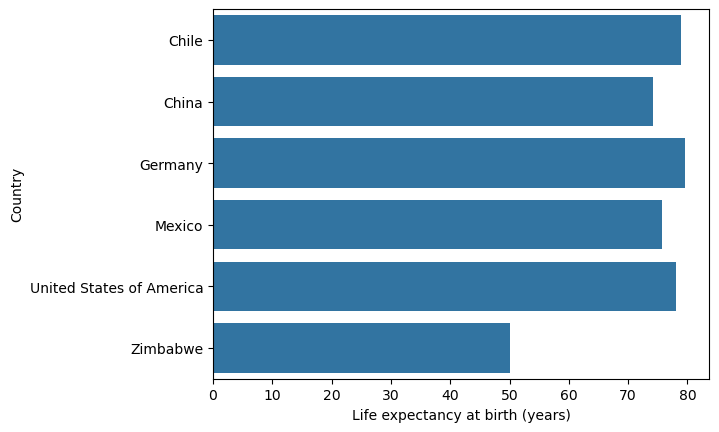

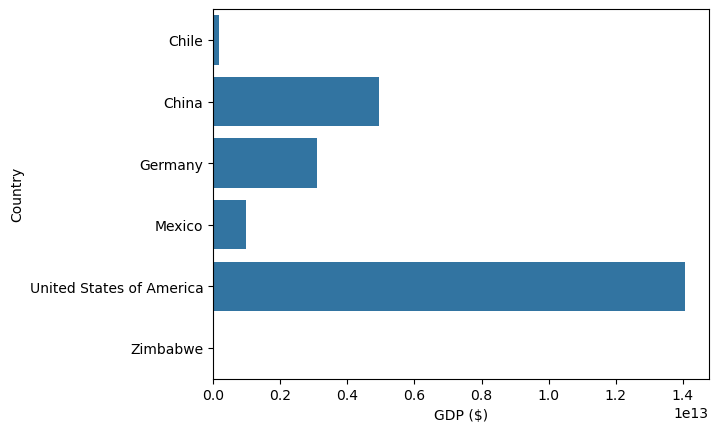

<Figure size 640x480 with 0 Axes>

In [7]:
##Get average data
grouped_data = all_data.groupby('Country')[['GDP','LE']].mean().reset_index()
print(grouped_data)
le = grouped_data.LE
gdp = grouped_data.GDP

## Show a barplot with the average LE per country
sns.barplot(x="LE", y="Country", data=grouped_data)
plt.xlabel("Life expectancy at birth (years)")
plt.show()
plt.clf()

## Show a barplot with the average GDP per country
sns.barplot(x="GDP", y="Country", data=grouped_data)
plt.xlabel("GDP ($)")
plt.show()
plt.clf()

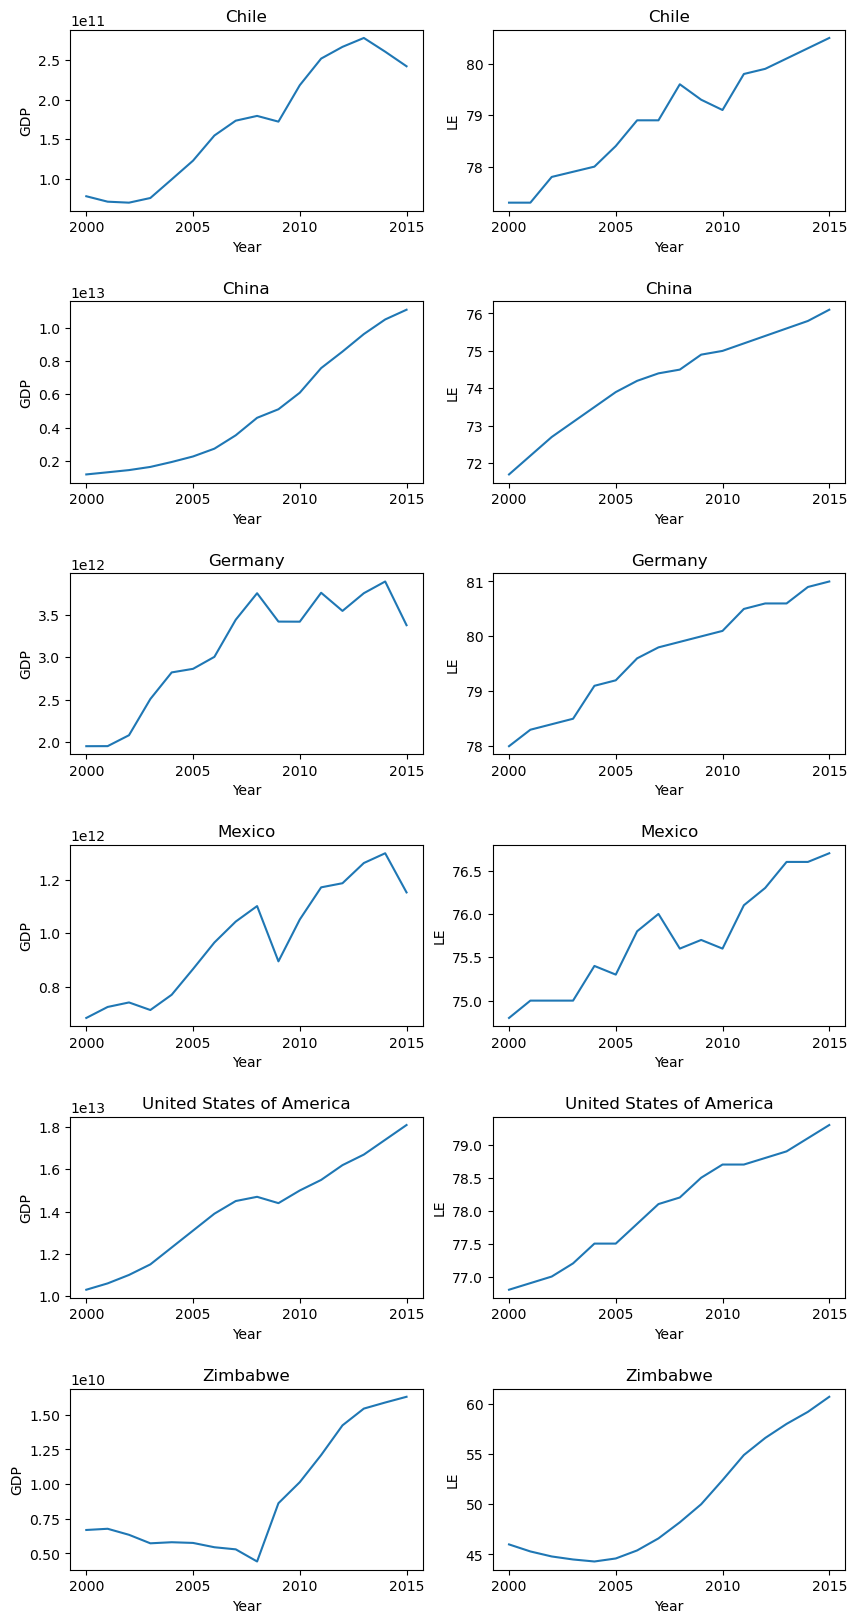

In [8]:
##Line Charts


plt.figure(figsize=(10,20))
i = 1
l = len(unique_countries)


for c in unique_countries:
    df = all_data[all_data.Country == c]
    plt.subplot(l,2,i)
    plt.plot(df.Year, df.GDP)
    plt.ylabel('GDP')
    plt.xlabel('Year')
    plt.title(c)
    plt.xticks(np.arange(min(df.Year), max(df.Year)+ 1, step=5))

    i = i + 1
    plt.subplot(l,2,i)
    plt.plot(df.Year, df.LE)
    plt.ylabel('LE')
    plt.xlabel('Year')
    plt.title(c)
    plt.xticks(np.arange(min(df.Year), max(df.Year)+ 1, step=5))
    i = i + 1

plt.subplots_adjust(hspace=0.5)






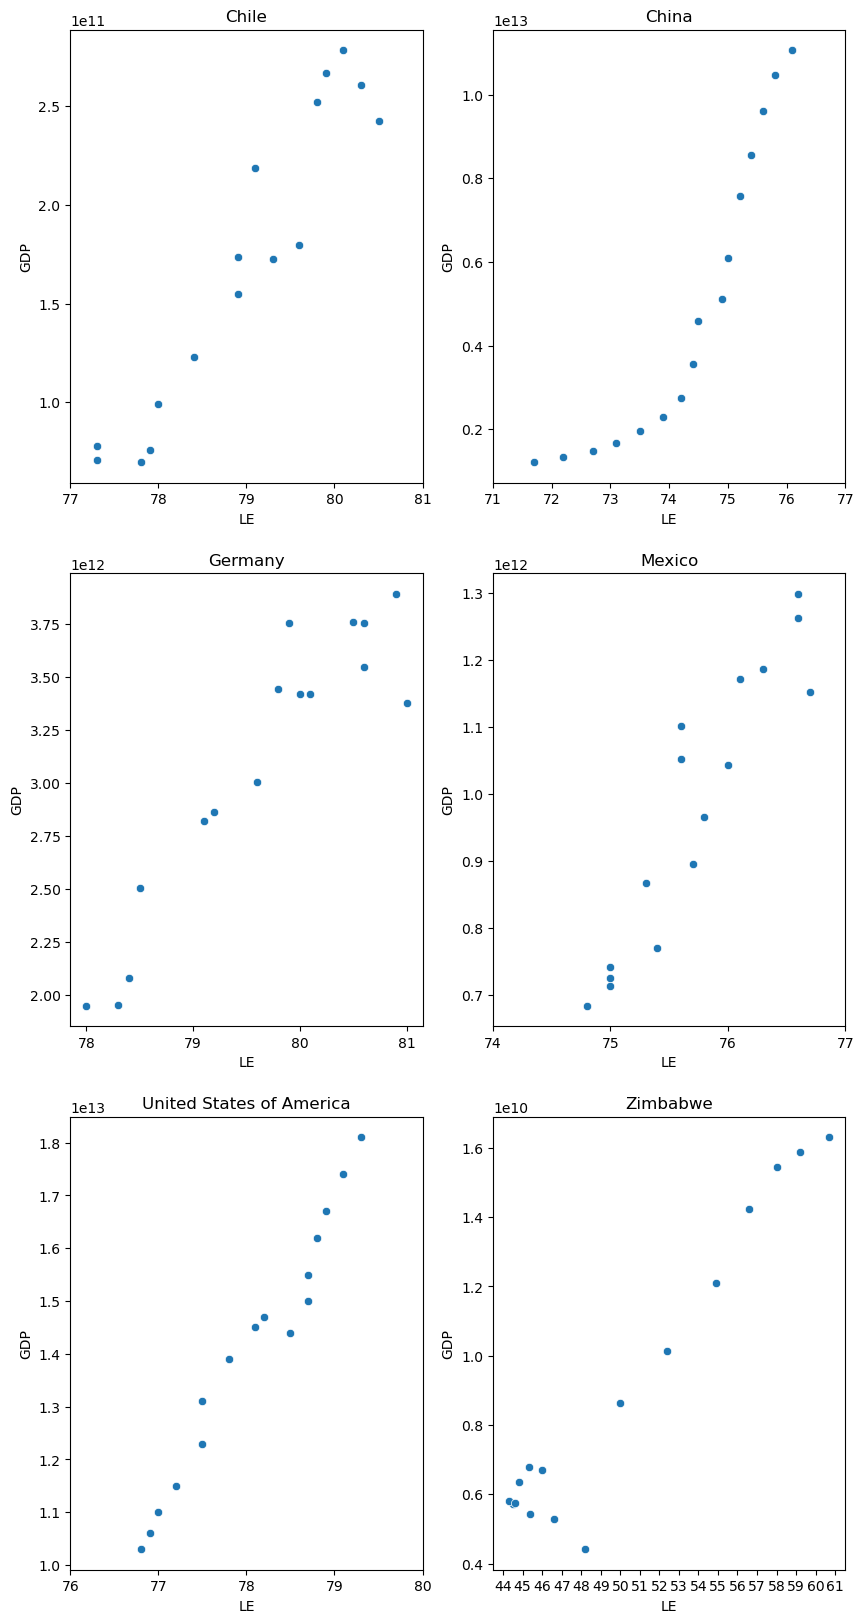

In [35]:
## Scatter plot

plt.figure(figsize=(10,20))
i = 1
l = len(unique_countries)

for c in unique_countries:
    df = all_data[all_data.Country == c]
    plt.subplot(l//2,2,i)
    sns.scatterplot(x=df.LE, y=df.GDP)
    plt.ylabel('GDP')
    plt.xlabel('LE')
    plt.title(c)
    plt.xticks(np.arange(math.floor(min(df.LE)), max(df.LE)+ 1, step=1))
    i = i + 1
    

Conclusion

What is the average life expectancy (LE) and GDP per country?

Chile has an average life expectancy of 78.94 and a GDP mean of 169.79B
China has an average life expectancy of 74.26 and a GDP mean of 4957.71$
Germany has an average life expectancy of 79.66 and a GDP mean of 3094.7B$
Mexico has an average life expectancy of 75.72 and a GDP mean of 976.5B$
United States of America has an average life expectancy of 78.06 and a GDP mean of 1407.0B$
Zimbabwe has an average life expectancy of 50.09 and a GDP mean of 

    
How did GDP and LE evolved through the 
GDP and LE increased for all the countries in this study.
years?
Is there a correlation between the 2 
Yes, there is a positive correlation between the 2 fields.fields?